In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from speech_modeling import h_input, h_model
import pandas as pd
import os

In [3]:
df = pd.read_csv(os.path.join('data', 'timit-results.csv'), low_memory=False)
input_data = h_input(df)
input_data.process('region')
input_data.select_features(selected_features=['F1', 'F2'])
input_data.select_places(places=['newengland', 'northern', 'northmidland', 'southmidland', 'southern', 'newyorkcity', 'western', 'movedaround'])
input_data.output_input_df(os.path.join('data', 'timit-input_df.csv'))
input_data.normalize(method='minmax')
input_data.calculate_vif(filename=os.path.join('data', 'timit-nyc-vif.csv'))
print("Completed")

Completed


In [4]:
model_data = input_data.input_df.copy()
model_features = list(input_data.input_df.columns[4:])
m = h_model(data=model_data, features=model_features, y_feature="location", y_main="newyorkcity")
m.fit(model_type="rforest", cv_method="LOO", var_imp_type="mdi")
m.output_importances(os.path.join('data', 'timit-nyc-mdi.csv'))


Fitting model of type rforest
Fitting LOOCV split 0
Fitting LOOCV split 10
Fitting LOOCV split 20
Fitting LOOCV split 30
Fitting LOOCV split 40
Fitting LOOCV split 50
Fitting LOOCV split 60
Fitting LOOCV split 70
Fitting LOOCV split 80
Fitting LOOCV split 90
Learner 1 Accuracy: 0.87
Learner 1 Variable Importance Measures:
F1-carry  0.208732
F1-water  0.095419
F1-all    0.078632
F2-all    0.066889
F1-had    0.049635
F2-carry  0.033290
F2-water  0.033066
F2-dark   0.030703
F2-an     0.025768
F2-had    0.021654

Fitting model of type rforest
Fitting LOOCV split 0
Fitting LOOCV split 10
Fitting LOOCV split 20
Fitting LOOCV split 30
Fitting LOOCV split 40
Fitting LOOCV split 50
Fitting LOOCV split 60
Fitting LOOCV split 70
Fitting LOOCV split 80
Fitting LOOCV split 90
Learner 2 Accuracy: 0.87
Learner 2 Variable Importance Measures:
F1-carry  0.202081
F1-all    0.101521
F1-water  0.096075
F2-all    0.063261
F1-had    0.044480
F2-water  0.034266
F2-dark   0.033193
F2-an     0.026342
F2-carry

In [5]:
m.var_imp.head()

,feature,mean,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,iteration_9,iteration_10,iteration_11,iteration_12
3,F1-carry,0.188528,0.208732,0.195431,0.205740,0.165125,0.200412,0.173472,0.154986,0.206412,0.175687,0.181151,0.217657,0.177537
18,F1-water,0.118472,0.095419,0.096731,0.116836,0.157924,0.056623,0.084425,0.161124,0.104603,0.166426,0.108908,0.105992,0.166656
0,F1-all,0.102830,0.078632,0.124410,0.129795,0.102681,0.120740,0.099975,0.086065,0.120576,0.084311,0.108610,0.092570,0.085589
21,F2-all,0.057668,0.066889,0.059633,0.062397,0.076341,0.032778,0.059225,0.040297,0.046533,0.060647,0.075354,0.047631,0.064290
39,F2-water,0.037239,0.033066,0.035465,0.026553,0.059390,0.011337,0.036229,0.044683,0.030912,0.057586,0.040294,0.026693,0.044657


In [6]:
m.sample_predict()

Predicted location: newyorkcity


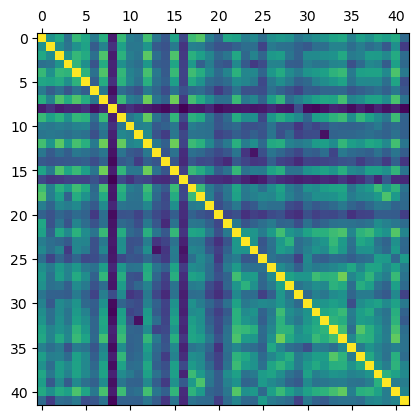

In [7]:
### Pearson Correlation Coefficients Graphed
import matplotlib.pyplot as plt
corr_df = pd.DataFrame(input_data.input_df, columns=model_features).corr()
fig = plt.matshow(corr_df)
plt.savefig(os.path.join("plots", "timit-nyc-corr_matrix"))
plt.show()
corr_df.to_csv(os.path.join("data", "timit-nyc-corr_df.csv"))

In [8]:
import pandas as pd
import sklearn
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_features': [10, 15, 20, 25], # 20
    'min_samples_leaf': [1, 2, 3], # 2
    'min_samples_split': [6, 7, 8, 9], # 8
    'n_estimators': [80, 90, 100, 110] # 100
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(m.X_s, m.y_s)
grid_search.best_params_

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[CV] END criterion=entropy, max_features=10, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.6s
[CV] END criterion=entropy, max_features=10, min_samples_leaf=1, min_samples_split=7, n_estimators=90; total time=   0.5s
[CV] END criterion=entropy, max_features=10, min_samples_leaf=1, min_samples_split=8, n_estimators=80; total time=   0.5s
[CV] END criterion=entropy, max_features=10, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_features=10, min_samples_leaf=1, min_samples_split=9, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_features=10, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_features=10, min_samples_leaf=2, min_samples_split=6, n_estimators=80; total time=   0.3s
[CV] END criterion=entropy, max_features=10, min_samples_leaf=2, min_samples_spl

{'criterion': 'gini',
 'max_features': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 90}

[CV] END criterion=log_loss, max_features=25, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.4s
[CV] END criterion=log_loss, max_features=25, min_samples_leaf=1, min_samples_split=7, n_estimators=100; total time=   0.5s
[CV] END criterion=log_loss, max_features=25, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=log_loss, max_features=25, min_samples_leaf=1, min_samples_split=9, n_estimators=80; total time=   0.2s
[CV] END criterion=log_loss, max_features=25, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.4s
[CV] END criterion=log_loss, max_features=25, min_samples_leaf=2, min_samples_split=6, n_estimators=90; total time=   0.5s
[CV] END criterion=log_loss, max_features=25, min_samples_leaf=2, min_samples_split=7, n_estimators=90; total time=   0.5s
[CV] END criterion=log_loss, max_features=25, min_samples_leaf=2, min_samples_split=8, n_estimators=80; total time=   0.4s
[CV] END crit